In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('marathon-data.csv')
data.head()


,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [2]:
def covert_time(s):
    return pd.to_timedelta(s)
data =pd.read_csv('marathon-data.csv',converters={'split':covert_time,'final':covert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [3]:

data['split_sec']=data['split'].astype(int)/1E9
data['final_sec']=data['final'].astype(int)/1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


AttributeError: 'JointGrid' object has no attribute 'ax_jointplot'

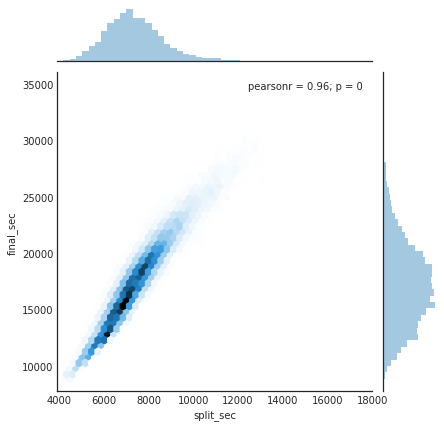

In [19]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec','final_sec',data,kind='hex')
    g.ax_jointplot(np.linspace(4000,16000),
                  np.linspace(8000,32000),':k')

In [20]:
data['split_frac']=1-2*data['split_sec']/data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


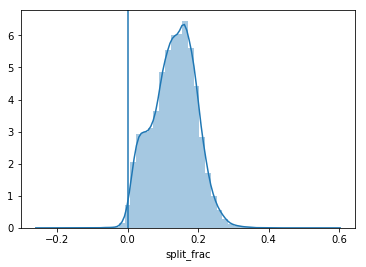

In [21]:
sns.distplot(data['split_frac'])
plt.axvline(0)

In [22]:
sum(data.split_frac < 0)

251

In [9]:
new_final=data['split_sec']*2
df = np.concatenate(new_final,data.final_sec)
permuted_data=np.permutation(df)
sample1=permuted_data[:len(data.split_sec)]
sample2=permuted_data[len(data.split_sec):]

TypeError: 'Series' object cannot be interpreted as an integer